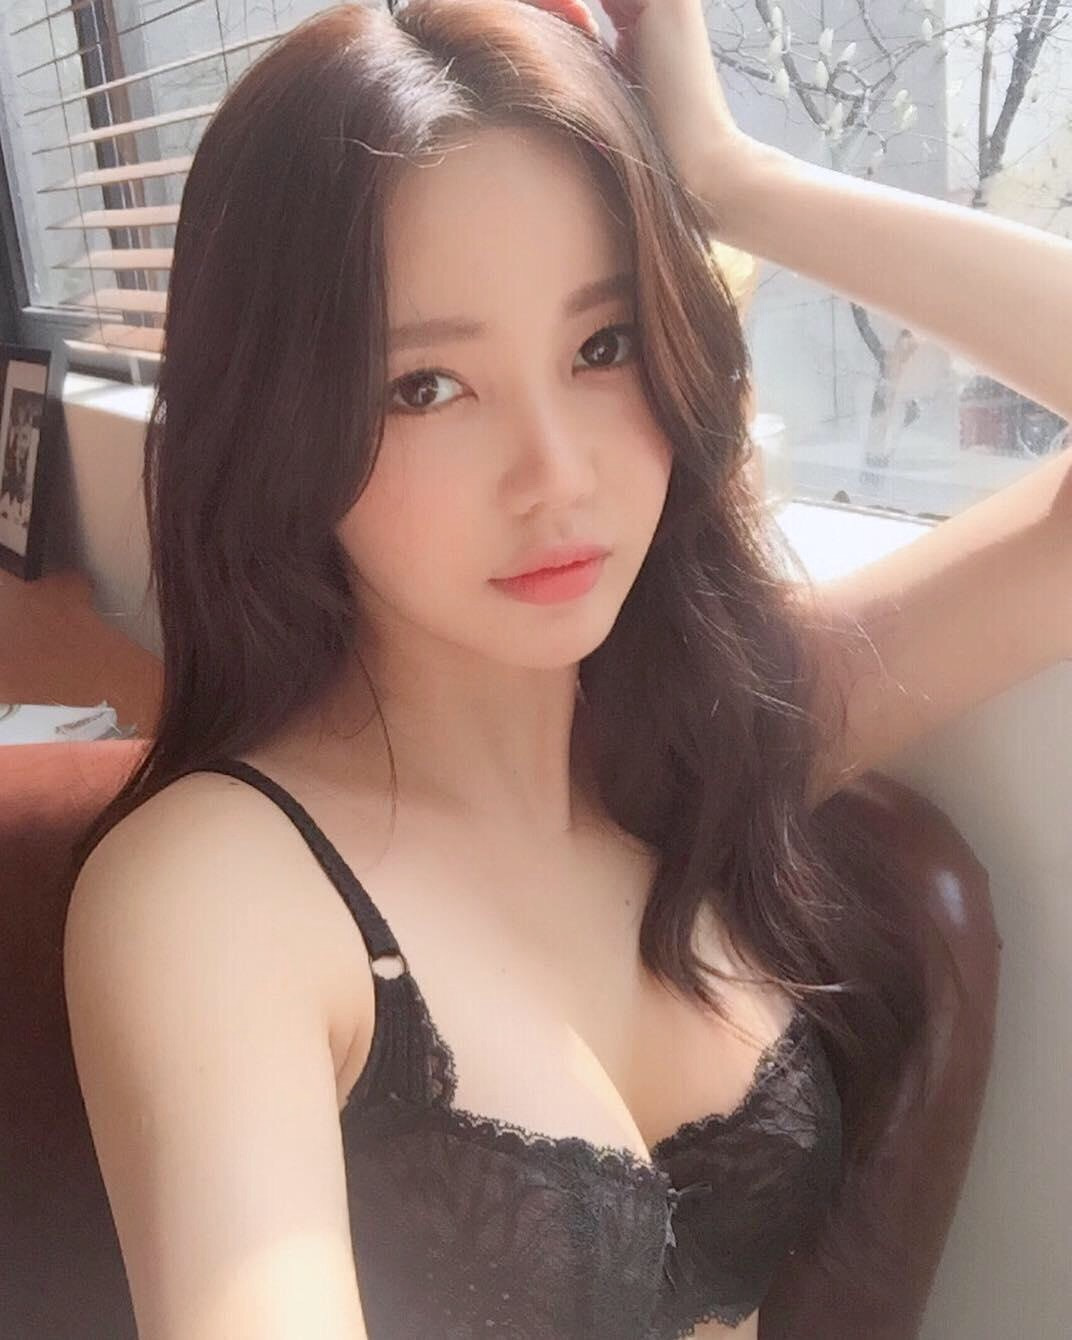

In [1]:
from IPython.display import Image
Image(r'D:/document/beauty/1.jpg', width=700, height=10)

# TextCNN

In [2]:
import tensorflow as tf
from tensorflow.layers import InputSpec
import numpy as np

D:\study\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 载入数据

In [3]:
test_data = np.arange(20).reshape(1, 4, 5, 1)
# test_data = tf.convert_to_tensor(test_data,dtype=tf.float32)

In [4]:
# test_data = tf.reshape(test_data, [4, 5, 1])

In [7]:
inputs = tf.placeholder(tf.float32, [None, 4,5, 1])
conv_0 = tf.nn.conv2d(inputs, filter=tf.ones([2,2,1,1]), strides=[1,1,1,1], padding="SAME")
max_pool = tf.nn.max_pool(conv_0, ksize=[1,2,2,1], strides=[1,1,1,1], padding='SAME')
sess = tf.Session()
sess.run(max_pool, feed_dict={inputs: test_data})

array([[[[36.],
         [40.],
         [44.],
         [44.],
         [23.]],

        [[56.],
         [60.],
         [64.],
         [64.],
         [33.]],

        [[56.],
         [60.],
         [64.],
         [64.],
         [33.]],

        [[33.],
         [35.],
         [37.],
         [37.],
         [19.]]]], dtype=float32)

In [14]:
a = tf.random_uniform(dtype=tf.float32, minval=0, maxval=1, shape=[4,5])
a = tf.reshape(a, [-1])
sess.run(a)

array([0.7832031 , 0.8487338 , 0.17308688, 0.07224607, 0.49264014,
       0.87726533, 0.61070716, 0.58126295, 0.6592953 , 0.01629639,
       0.6014359 , 0.37501037, 0.17475533, 0.97565854, 0.7115618 ,
       0.0213331 , 0.34395874, 0.6216427 , 0.2612219 , 0.24695826],
      dtype=float32)